In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

,RegionName,Average Price,Date,Date Numeric
0,"New York, NY",179016.866340,2000-01-31,949276800000000000
1,"Los Angeles, CA",225229.750975,2000-01-31,949276800000000000
2,"Chicago, IL",140260.935566,2000-01-31,949276800000000000
3,"Dallas, TX",128720.957496,2000-01-31,949276800000000000
4,"Houston, TX",117733.849496,2000-01-31,949276800000000000
...,...,...,...,...
1390,"New York, NY",568543.199929,2023-03-31,1680220800000000000
1391,"Los Angeles, CA",873619.353300,2023-03-31,1680220800000000000
1392,"Chicago, IL",289343.730912,2023-03-31,1680220800000000000
1393,"Dallas, TX",368252.408975,2023-03-31,1680220800000000000


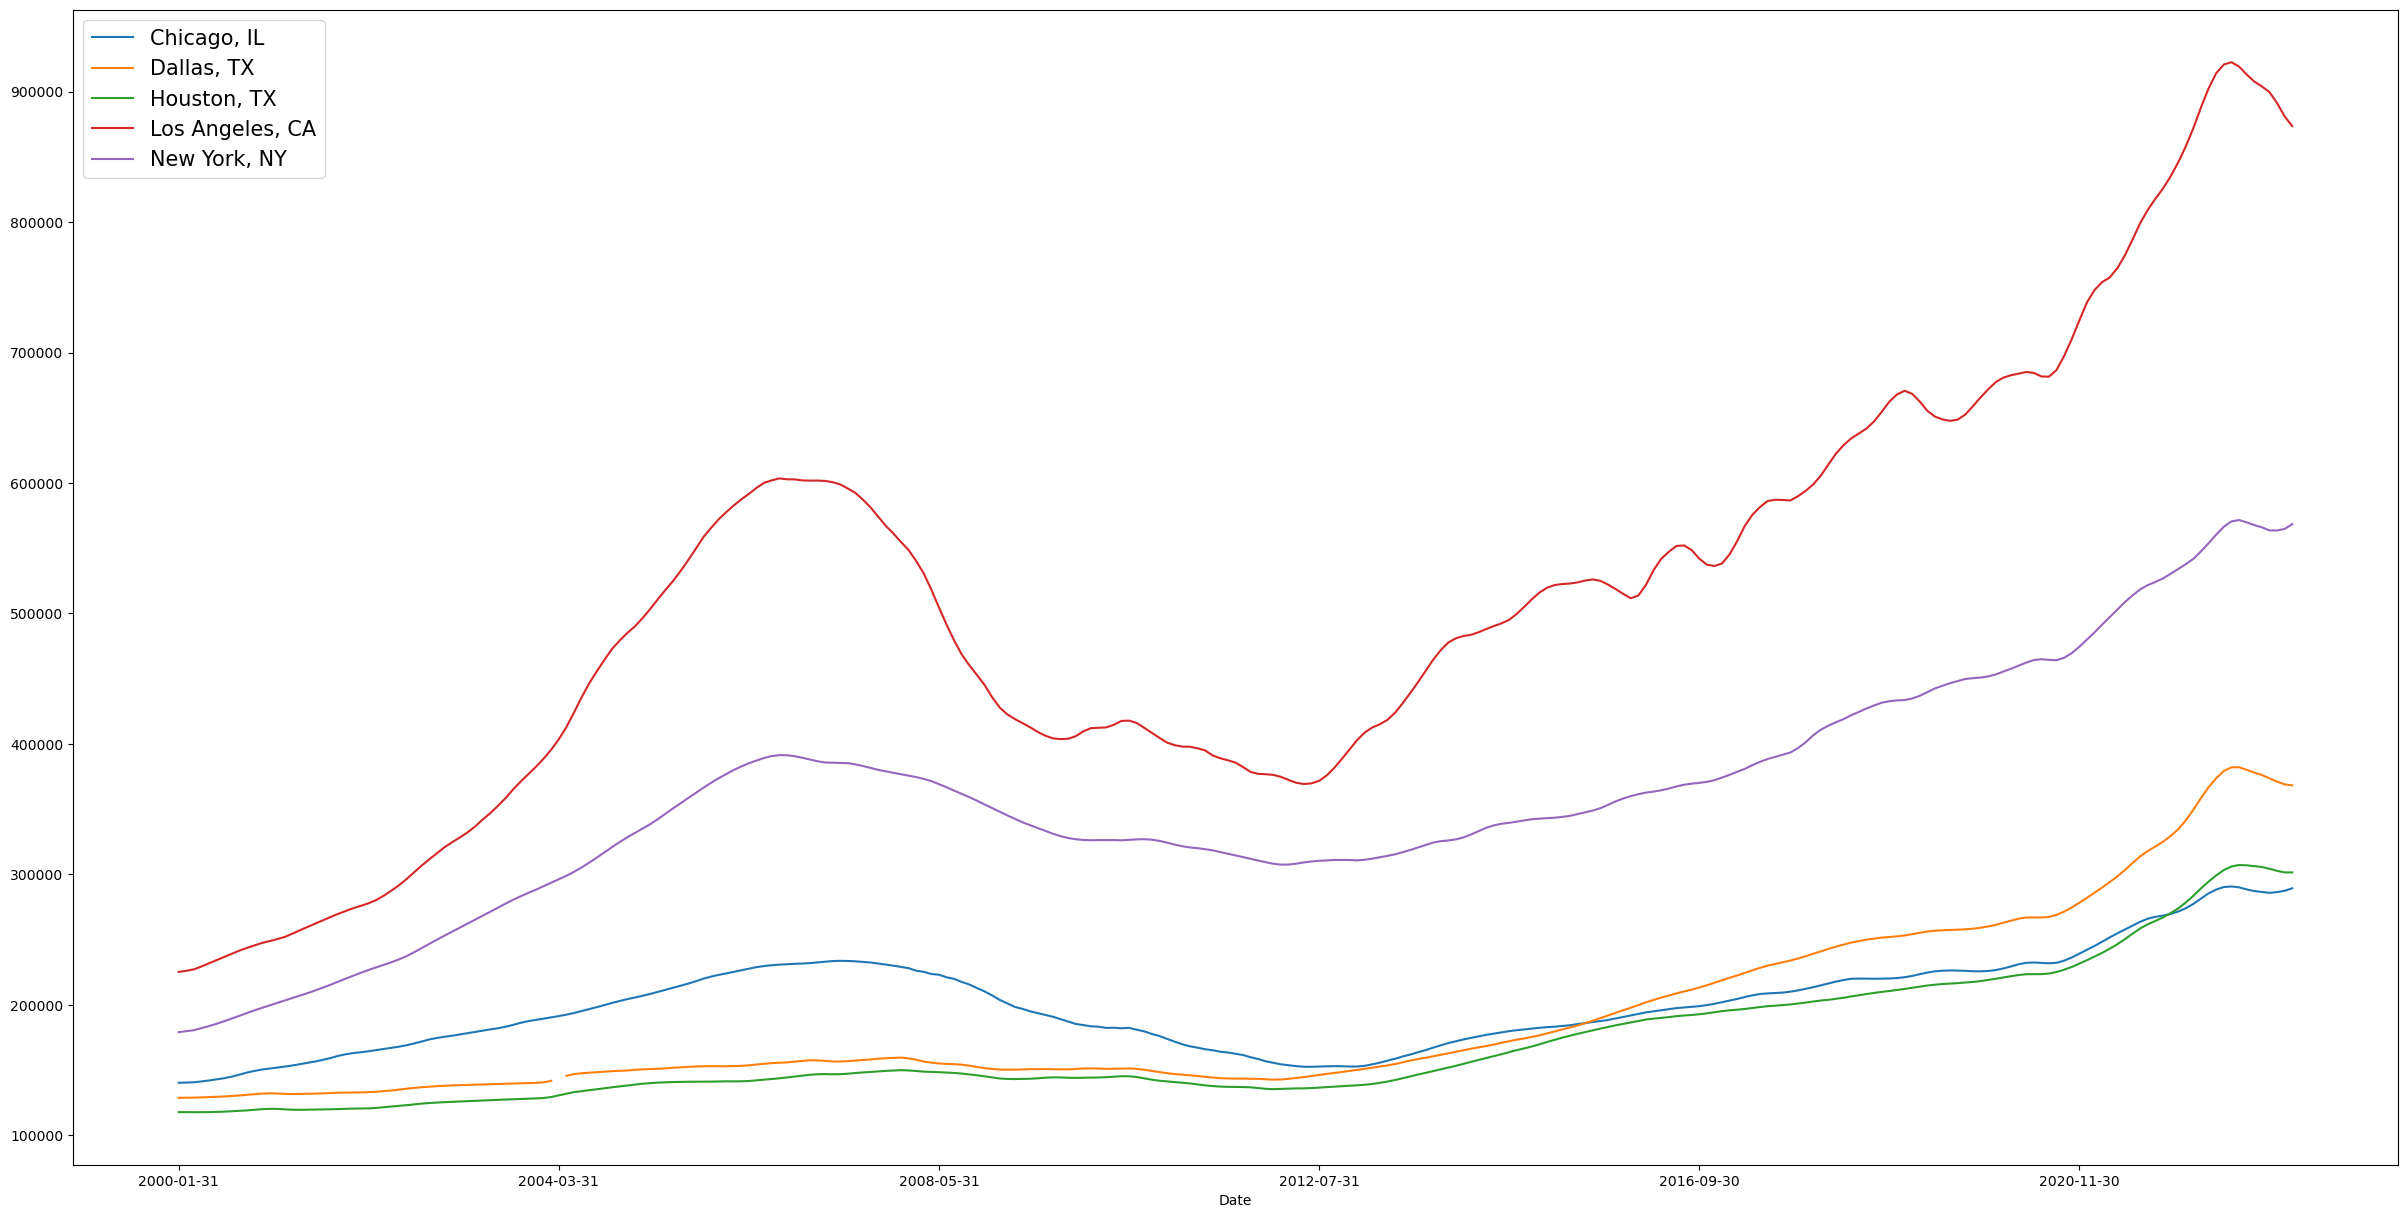

In [71]:
# Extract data of housing price average f| 5 most populated cities in US
prices = pd.read_csv('Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv').head(6).tail(-1)
prices = pd.melt(prices, id_vars=['RegionName'], value_vars=prices.columns[5:])
prices['Date'] = pd.to_datetime(prices['variable'])
prices['Date Numeric'] = pd.to_numeric(prices['Date'])
prices['Date'] = prices['Date'].astype('str')
prices = prices.drop('variable', axis=1).rename(columns={'value': 'Average Price'})
display(prices)
prices.set_index('Date', inplace=True)
# Plot the avergae house price per month for each city
prices.groupby('RegionName')['Average Price'].plot(legend=True, figsize=(30, 15))
plt.legend(prop={'size': 15})
plt.rcParams.update({'font.size': 10})
plt.show()

In [72]:
# This function drops rows that combine multiple cities (which makes no sense) after melting
def drop_invalid(df):
    cities = [] 
    for index, row in df.iterrows():
        if ('New York' in row['variable'] and row['City'] == 'New York, NY'):
            cities.append('New York, NY')
        elif ('Los Angeles' in row['variable'] and row['City'] == 'Los Angeles, CA'):
            cities.append('Los Angeles, CA')
        elif ('Chicago' in row['variable'] and row['City'] == 'Chicago, IL'):
            cities.append('Chicago, IL')
        elif ('Houston' in row['variable'] and row['City'] == 'Houston, TX'):
            cities.append('Houston, TX')
        elif ('Dallas' in row['variable'] and row['City'] == 'Dallas, TX'):
            cities.append('Dallas, TX')
        else:
            df = df.drop(index)
     
    df['City'] = cities      
    return df.drop('variable',axis=1)

pd.set_option('display.max_rows', 500)

# Read the data 
df = pd.read_csv('demographics.csv')
df['Year'] = pd.DatetimeIndex(df['date']).year
# Get recent data 
df = df[(df['Year'] > 2011)] 
df = df.drop('date', axis=1)

# DATA TIDYING. VERY MESSY, LOTS OF MELTING, BUT NECESSARY
df2 = df.head(10)
df = df.tail(-10)
df = df.groupby('Year').aggregate(np.mean)
df = df.fillna(df2.set_index('Year')).reset_index()
            
df = pd.melt(df, id_vars=['Year',
       'Los Angeles Count_Person_EducationalAttainmentBachelorsDegreeOrHigher',
       'Los Angeles Count_Person',
       'Chicago Count_Person_EducationalAttainmentBachelorsDegreeOrHigher',
       'Chicago Count_Person',
       'New York City Count_Person_EducationalAttainmentBachelorsDegreeOrHigher',
       'New York City Count_Person',
       'Dallas Count_Person_EducationalAttainmentBachelorsDegreeOrHigher',
       'Dallas Count_Person',
       'Houston Count_Person_EducationalAttainmentBachelorsDegreeOrHigher',
       'Houston Count_Person', 'Los Angeles UnemploymentRate_Person',
       'Chicago UnemploymentRate_Person',
       'New York City UnemploymentRate_Person',
       'Dallas UnemploymentRate_Person', 'Houston UnemploymentRate_Person',
       'Los Angeles Median_Income_Household',
       'Chicago Median_Income_Household',
       'New York City Median_Income_Household',
       'Dallas Median_Income_Household', 'Houston Median_Income_Household'], value_name='Population under poverty line', 
             value_vars=['Los Angeles Count_Person_BelowPovertyLevelInThePast12Months', 'Chicago Count_Person_BelowPovertyLevelInThePast12Months',
             'New York City Count_Person_BelowPovertyLevelInThePast12Months',
            'Houston Count_Person_BelowPovertyLevelInThePast12Months',
            'Dallas Count_Person_BelowPovertyLevelInThePast12Months'])  

cities = [] 
for index, row in df.iterrows():
    if ('New York City' in row['variable']):
        cities.append('New York, NY')
    elif ('Los Angeles' in row['variable']):
        cities.append('Los Angeles, CA')
    elif ('Chicago' in row['variable']):
        cities.append('Chicago, IL')
    elif ('Houston' in row['variable']):
        cities.append('Houston, TX')
    else:
        cities.append('Dallas, TX')
     
df['City'] = cities      
df = df.drop('variable',axis=1)

df = pd.melt(df, id_vars=['Year', 'Population under poverty line', 'Los Angeles Count_Person', 'City',
                        'Chicago Count_Person',
                        'New York City Count_Person',
                        'Dallas Count_Person',
                        'Houston Count_Person', 'Los Angeles UnemploymentRate_Person',
                        'Chicago UnemploymentRate_Person',
                        'New York City UnemploymentRate_Person',
                        'Dallas UnemploymentRate_Person', 'Houston UnemploymentRate_Person',
                        'Los Angeles Median_Income_Household',
                        'Chicago Median_Income_Household',
                        'New York City Median_Income_Household',
                        'Dallas Median_Income_Household', 'Houston Median_Income_Household'], value_name='Population with Bachelors or Higher',       
             value_vars=['Los Angeles Count_Person_EducationalAttainmentBachelorsDegreeOrHigher',         
                        'Chicago Count_Person_EducationalAttainmentBachelorsDegreeOrHigher',
                        'New York City Count_Person_EducationalAttainmentBachelorsDegreeOrHigher',
                        'Dallas Count_Person_EducationalAttainmentBachelorsDegreeOrHigher',
                        'Houston Count_Person_EducationalAttainmentBachelorsDegreeOrHigher'])

df = drop_invalid(df)

df = pd.melt(df, id_vars=['Year', 'Population under poverty line', 'Population with Bachelors or Higher', 'City',
                            'Los Angeles UnemploymentRate_Person',
                            'Chicago UnemploymentRate_Person',
                            'New York City UnemploymentRate_Person',
                            'Dallas UnemploymentRate_Person', 'Houston UnemploymentRate_Person',
                            'Los Angeles Median_Income_Household',
                            'Chicago Median_Income_Household',
                            'New York City Median_Income_Household',
                            'Dallas Median_Income_Household', 'Houston Median_Income_Household'], 
             value_name='Total Population', value_vars=['Los Angeles Count_Person',
                                                        'Chicago Count_Person',
                                                      'New York City Count_Person',
                                                        'Dallas Count_Person',
                                                        'Houston Count_Person'])
df = drop_invalid(df)
df = pd.melt(df, id_vars=['Year', 'Population under poverty line', 'Population with Bachelors or Higher', 'Total Population', 'City',
                        'Los Angeles Median_Income_Household',
                        'Chicago Median_Income_Household',
                        'New York City Median_Income_Household',
                        'Dallas Median_Income_Household', 'Houston Median_Income_Household'], 
             value_name='Unemployment Rate', value_vars=['Los Angeles UnemploymentRate_Person',
                                                        'Chicago UnemploymentRate_Person',
                                                        'New York City UnemploymentRate_Person',
                                                        'Dallas UnemploymentRate_Person', 'Houston UnemploymentRate_Person'])
df = drop_invalid(df)
df = pd.melt(df, id_vars=['Year', 'City', 'Population under poverty line', 'Population with Bachelors or Higher', 'Total Population', 'Unemployment Rate'], 
             value_name='Median Household Income', value_vars=['Los Angeles Median_Income_Household',
                                   'Chicago Median_Income_Household',
                                   'New York City Median_Income_Household',
                                   'Dallas Median_Income_Household', 'Houston Median_Income_Household'])
df = drop_invalid(df)

for index, row in df.iterrows():
    if (pd.isna(row['Population with Bachelors or Higher']) or pd.isna(row['Total Population']) or pd.isna(row['Unemployment Rate']) or pd.isna(row['Median Household Income'])):
        df = df.drop(index)
df = df.reset_index().drop('index', axis=1)
df['Percent of Population with Bachelors or Higher'] = df['Population with Bachelors or Higher'] / df['Total Population']
df['Percent of Population Under Poverty Line'] = df['Population under poverty line'] / df['Total Population']
df = df.drop('Population with Bachelors or Higher', axis=1).drop('Population under poverty line', axis=1)
df

,Year,City,Total Population,Unemployment Rate,Median Household Income,Percent of Population with Bachelors or Higher,Percent of Population Under Poverty Line
0,2012,"Los Angeles, CA",3847857.0,11.608333,49745.0,0.200222,0.205543
1,2013,"Los Angeles, CA",3877721.0,10.325000,49497.0,0.202665,0.212788
2,2014,"Los Angeles, CA",3904102.0,8.716667,49682.0,0.207117,0.217890
3,2015,"Los Angeles, CA",3933644.0,7.075000,50205.0,0.212554,0.215419
4,2016,"Los Angeles, CA",3957520.0,5.358333,51538.0,0.217003,0.209460
5,2017,"Los Angeles, CA",3975067.0,4.841667,54501.0,0.223108,0.198819
6,2018,"Los Angeles, CA",3981140.0,4.641667,58385.0,0.229663,0.186202
7,2019,"Los Angeles, CA",3982885.0,4.483333,62142.0,0.236629,0.175991
8,2020,"Los Angeles, CA",3889834.0,12.441667,65290.0,0.253518,0.169352
9,2012,"Chicago, IL",2719039.0,10.033333,47408.0,0.220218,0.216182
